In [1]:
import matplotlib as mat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import scipy as scipy
from scipy.interpolate import interp1d
from scipy import stats

In [2]:
print('matplotlib version :', mat.__version__, '\n'
    'pandas version : ', pd.__version__, '\n'
     'numpy version : ', np.__version__, '\n'
      'seaborn version : ', sns.__version__, '\n'
     'missingno version : ', msno.__version__, '\n'
      'scipy version : ', scipy.__version__)
#On affiche les versions de chacune des librairies importées

matplotlib version : 3.5.2 
pandas version :  1.4.4 
numpy version :  1.21.5 
seaborn version :  0.11.2 
missingno version :  0.5.1 
scipy version :  1.9.1


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_theme(style="ticks", palette="pastel")
#La première ligne permet d'afficher toutes les valeurs présentes dans les tableau au millième près
#La seconde est un choix des couleurs utilisées pour les graphiques (pastel)

In [4]:
Edcount = pd.read_csv('EdStatsCountry.csv')

In [5]:
Edcount.describe()
#Répertorie quelques valeurs intéressantes statistiquement

National accounts reference year  Latest industrial data  \
count                            32.000                 107.000   
mean                           2001.531                2008.103   
std                               5.249                   2.617   
min                            1987.000                2000.000   
25%                            1996.750                2007.500   
50%                            2002.000                2009.000   
75%                            2005.000                2010.000   
max                            2012.000                2010.000   

       Latest trade data  Unnamed: 31  
count            185.000        0.000  
mean            2010.995          NaN  
std                2.570          NaN  
min             1995.000          NaN  
25%             2011.000          NaN  
50%             2012.000          NaN  
75%             2012.000          NaN  
max             2012.000          NaN

In [6]:
Edcount.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [7]:
Edcount = Edcount.set_index('Short Name')
Edcount

Country Code    Table Name                     Long Name  \
Short Name                                                              
Aruba                 ABW         Aruba                         Aruba   
Afghanistan           AFG   Afghanistan  Islamic State of Afghanistan   
Angola                AGO        Angola   People's Republic of Angola   
Albania               ALB       Albania           Republic of Albania   
Andorra               AND       Andorra       Principality of Andorra   
...                   ...           ...                           ...   
Kosovo                XKX        Kosovo            Republic of Kosovo   
Yemen                 YEM   Yemen, Rep.             Republic of Yemen   
South Africa          ZAF  South Africa      Republic of South Africa   
Zambia                ZMB        Zambia            Republic of Zambia   
Zimbabwe              ZWE      Zimbabwe          Republic of Zimbabwe   

             2-alpha code       Currency Unit  \
Short Name                                      
Aruba                  AW       Aruban florin   
Afghanistan            AF      Afghan afghani   
Angola                 AO      Angolan kwanza   
Albania                AL        Albanian lek   
Andorra                AD                Euro   
...                   ...                 ...   
Kosovo                NaN                Euro   
Yemen                  YE         Yemeni rial   
South Africa           ZA  South African rand   
Zambia                 ZM  New Zambian kwacha   
Zimbabwe               ZW         U.S. dollar   

                                                  Special Notes  \
Short Name                                                        
Aruba         SNA data for 2000-2011 are updated from offici...   
Afghanistan   Fiscal year end: March 20; reporting period fo...   
Angola        April 2013 database update: Based on IMF data,...   
Albania                                                     NaN   
Andorra                                                     NaN   
...                                                         ...   
Kosovo        Kosovo became a World Bank member on June 29, ...   
Yemen         Based on official government statistics and In...   
South Africa  Fiscal year end: March 31; reporting period fo...   
Zambia        National accounts data have rebased to reflect...   
Zimbabwe      Fiscal year end: June 30; reporting period for...   

                                  Region          Income Group WB-2 code  \
Short Name                                                                 
Aruba          Latin America & Caribbean  High income: nonOECD        AW   
Afghanistan                   South Asia            Low income        AF   
Angola                Sub-Saharan Africa   Upper middle income        AO   
Albania            Europe & Central Asia   Upper middle income        AL   
Andorra            Europe & Central Asia  High income: nonOECD        AD   
...                                  ...                   ...       ...   
Kosovo             Europe & Central Asia   Lower middle income        KV   
Yemen         Middle East & North Africa   Lower middle income        RY   
South Africa          Sub-Saharan Africa   Upper middle income        ZA   
Zambia                Sub-Saharan Africa   Lower middle income        ZM   
Zimbabwe              Sub-Saharan Africa            Low income        ZW   

                                    National accounts base year  ...  \
Short Name                                                       ...   
Aruba                                                      2000  ...   
Afghanistan                                             2002/03  ...   
Angola                                                     2002  ...   
Albania       Original chained constant price data are resca...  ...   
Andorra                                                    1990  ...   
...                                                         

In [8]:
Edcount.isna().sum()
#Compte le nombre de valeurs manquantes dans notre Dataframe

Country Code                                           0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                                       96
Balance of Payments Manual in u

In [9]:
Edcount2 = pd.DataFrame(Edcount[['Country Code', 'Income Group']])
#On sauvegarde uniquement la colonne Income group de notre dataframe, ainsi que la colonne Country Code pour pouvoir effectuer
#Une jointure par la suite

In [10]:
Edcount2 = Edcount2.dropna(axis = 0)
#Suppression des lignes avec valeurs manquantes

In [11]:
#Importation de notre autre Dataframe

In [12]:
Edata = pd.read_csv('EdStatsData.csv')

In [13]:
Data_year = Edata[['Country Code', 'Country Name', 'Indicator Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
#On conserve en premier lieu uniquement les données de 2000 à 2015, celles qui suivent sont des prévisions et celles qui précèdent
#datent trop et risquent donc d'être peu informatives

In [14]:
df = pd.merge(Data_year, Edcount2, on = 'Country Code', how = 'right')
#On joint au tableau ci-dessus la colonne Income group précedemment obtenue, avec Country Code en clé primaire

In [15]:
df.isna().sum()/len(df)*100
#On compte le pourcentage de NaN par colonne dans notre nouveau Dataframe

Country Code      0.000
Country Name      0.000
Indicator Name    0.000
2000             78.568
2001             85.365
2002             85.272
2003             84.471
2004             84.671
2005             77.629
2006             83.216
2007             83.619
2008             83.981
2009             83.007
2010             70.233
2011             82.493
2012             82.392
2013             83.606
2014             86.581
2015             83.536
Income Group      0.000
dtype: float64

<AxesSubplot:>

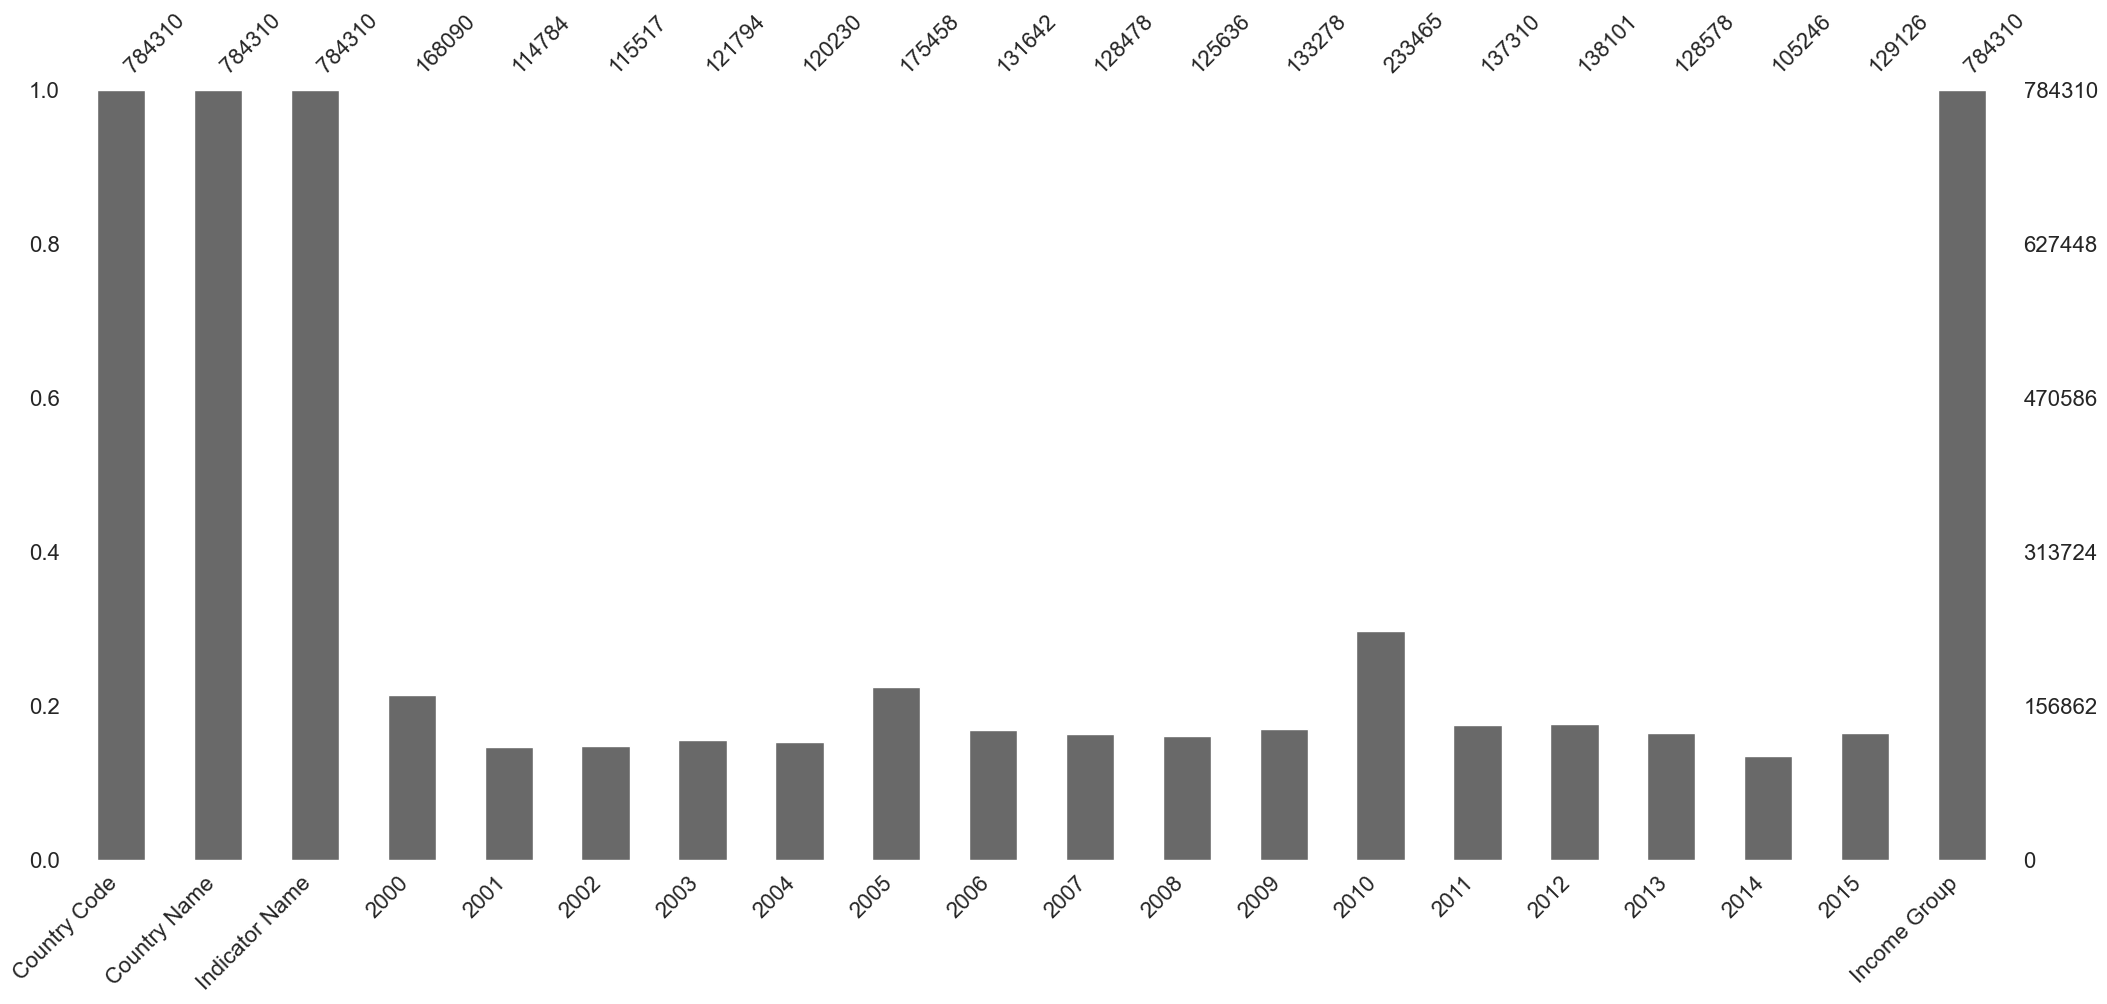

In [16]:
msno.bar(df)
#Représentation graphique de la quantité de valeur manquante par colonne dans notre nouveau Dataframe

In [17]:
def missing_values(df, cols_list):
    x = df[cols_list].isna().sum() / len(df) * 100
    return(x)
#Cette fonction compte le pourcentage de NaN par colonne

In [18]:
missing_values(df, ['Country Name', 'Indicator Name', '2003'])

Country Name      0.000
Indicator Name    0.000
2003             84.471
dtype: float64

In [19]:
df_tertiary = df[df['Indicator Name'] == 'Enrolment in tertiary education, all programmes, both sexes (number)']
df_secondary = df[df['Indicator Name'] == 'Enrolment in upper secondary education, both sexes (number)']
df_pc = df[df['Indicator Name'] == 'Personal computers (per 100 people)']
df_internet = df[df['Indicator Name'] == 'Internet users (per 100 people)']
df_gov = df[df['Indicator Name'] == 'Government expenditure on education as % of GDP (%)']
#A partir de notre Dataframe, les 5 indicateurs choisis sont répartis en 5 sous Dataframe respectifs pour faciliter le filtrage

In [20]:
df_tertiary

Country Code  Country Name  \
1204            ABW         Aruba   
4869            AFG   Afghanistan   
8534            AGO        Angola   
12199           ALB       Albania   
15864           AND       Andorra   
...             ...           ...   
767189          XKX        Kosovo   
770854          YEM   Yemen, Rep.   
774519          ZAF  South Africa   
778184          ZMB        Zambia   
781849          ZWE      Zimbabwe   

                                           Indicator Name      2000      2001  \
1204    Enrolment in tertiary education, all programme...  1578.000  1628.000   
4869    Enrolment in tertiary education, all programme...       NaN       NaN   
8534    Enrolment in tertiary education, all programme...       NaN       NaN   
12199   Enrolment in tertiary education, all programme... 40125.000 40859.000   
15864   Enrolment in tertiary education, all programme...       NaN       NaN   
...                                                   ...       ...       ...   
767189  Enrolment in tertiary education, all programme...       NaN       NaN   
770854  Enrolment in tertiary education, all programme...       NaN       NaN   
774519  Enrolment in tertiary education, all programme...       NaN       NaN   
778184  Enrolment in tertiary education, all programme...       NaN       NaN   
781849  Enrolment in tertiary education, all programme...       NaN       NaN   

             2002       2003       2004       2005       2006       2007  \
1204     1592.000   1672.000   1704.000   2106.000   2094.000   2232.000   
4869          NaN  26211.000  27648.000        NaN        NaN        NaN   
8534    12566.000  48184.000  37547.000  48184.000  48694.000        NaN   
12199   42160.000  43600.000  53014.000  63257.000  74747.000  86863.000   
15864     267.000    306.000    331.000    342.000    401.000        NaN   
...           ...        ...        ...        ...        ...        ...   
767189        NaN        NaN        NaN        NaN        NaN        NaN   
770854 193426.000 193290.000 192071.000 199813.000 200853.000 236972.000   
774519        NaN        NaN        NaN        NaN        NaN        NaN   
778184        NaN        NaN        NaN        NaN        NaN        NaN   
781849        NaN        NaN        NaN        NaN        NaN        NaN   

             2008       2009       2010       2011        2012        2013  \
1204     2242.000   2196.000   2330.000   2504.000    2621.000    1181.000   
4869          NaN  95185.000        NaN  97504.000         NaN         NaN   
8534          NaN        NaN        NaN 142798.000         NaN  218679.000   
12199   90606.000  93139.000 122326.000 134877.000  160839.000  173029.000   
15864     459.000        NaN        NaN        NaN     491.000     538.000   
...           ...        ...        ...        ...         ...         ...   
767189        NaN        NaN        NaN        NaN         NaN         NaN   
770854 251187.000 274827.000 272130.000 267498.000         NaN         NaN   
774519        NaN        NaN        NaN        NaN 1005721.000 1035594.000   
778184        NaN        NaN        NaN  55759.000   56680.000         NaN   
781849        NaN        NaN  94611.000  93285.000   94012.000   94115.000   

              2014       2015          Income Group  
1204      1235.000   1166.000  High income: nonOECD  
4869    262874.000        NaN            Low income  
8534           NaN 221037.000   Upper middle income  
12199   173819.000 160527.000   Upper middle income  
15864      498.000    501.000  High income: nonOECD  
...            ...        ...                   ...  
767189         NaN        NaN   Lower middle income  
770854         NaN        NaN   Lower middle income  
774519 1018543.000        NaN   Upper middle income  
778184         NaN        NaN   Lower middle income  
781849         NaN 135575.000            Low income  

[214 rows x 20 columns]

In [21]:
df_secondary

Country Code  Country Name  \
1214            ABW         Aruba   
4879            AFG   Afghanistan   
8544            AGO        Angola   
12209           ALB       Albania   
15874           AND       Andorra   
...             ...           ...   
767199          XKX        Kosovo   
770864          YEM   Yemen, Rep.   
774529          ZAF  South Africa   
778194          ZMB        Zambia   
781859          ZWE      Zimbabwe   

                                           Indicator Name        2000  \
1214    Enrolment in upper secondary education, both s...    3119.000   
4879    Enrolment in upper secondary education, both s...         NaN   
8544    Enrolment in upper secondary education, both s...   85461.000   
12209   Enrolment in upper secondary education, both s...  104946.000   
15874   Enrolment in upper secondary education, both s...         NaN   
...                                                   ...         ...   
767199  Enrolment in upper secondary education, both s...         NaN   
770864  Enrolment in upper secondary education, both s...         NaN   
774529  Enrolment in upper secondary education, both s... 2221642.000   
778194  Enrolment in upper secondary education, both s...         NaN   
781859  Enrolment in upper secondary education, both s...  408251.000   

              2001        2002        2003        2004        2005  \
1214      3318.000    3525.000    3655.000    3632.000    3678.000   
4879    159952.000         NaN  115583.000  173356.000  190104.000   
8544     94167.000  112787.000         NaN         NaN         NaN   
12209   110996.000  122555.000  132932.000  142449.000  156015.000   
15874          NaN     805.000     752.000     771.000     951.000   
...            ...         ...         ...         ...         ...   
767199         NaN         NaN         NaN         NaN         NaN   
770864  491020.000         NaN  558596.000  598419.000  602476.000   
774529 2265640.000 2328021.000 2567962.000 2668053.000 2674378.000   
778194         NaN         NaN         NaN         NaN         NaN   
781859  414970.000  403509.000  371546.000         NaN         NaN   

              2006        2007        2008        2009        2010  \
1214      3883.000    4430.000    4060.000    3976.000    3913.000   
4879    271144.000  285290.000  361193.000  443002.000  567344.000   
8544    197174.000  194933.000  237699.000  257808.000  283340.000   
12209   164572.000  173269.000  177572.000  132803.000  140657.000   
15874     1051.000    1045.000    1069.000    1138.000    1221.000   
...            ...         ...         ...         ...         ...   
767199         NaN         NaN         NaN         NaN         NaN   
770864         NaN         NaN  571933.000         NaN  585649.000   
774529 2798702.000 2928463.000 2841880.000 2770334.000 2679093.000   
778194         NaN         NaN         NaN         NaN         NaN   
781859         NaN         NaN         NaN         NaN         NaN   

              2011        2012        2013        2014  2015  \
1214      3970.000    4841.000         NaN         NaN   NaN   
4879    743405.000  881415.000  969267.000  968769.000   NaN   
8544    303568.000         NaN         NaN         NaN   NaN   
12209   150134.000  152182.000  154425.000  151937.000   NaN   
15874     1259.000    1182.000    1160.000    1288.000   NaN   
...            ...         ...         ...         ...   ...   
767199         NaN         NaN         NaN         NaN   NaN   
770864  627316.000  654302.000  701984.000         NaN   NaN   
774529 2698097.000 2776178.000 2937283.000 2971802.000   NaN   
778194         NaN         NaN         NaN         NaN   NaN   
781859         NaN  481006.000  490522.000         NaN   NaN   

                Income Group  
1214    High income: nonOECD  
4879              Low income  
8544     Upper middle income  
12209    Upper middle income  
15874   High income: nonOECD  
...                      ...  
767199   Lower mi

In [22]:
df_pc

Country Code  Country Name                       Indicator Name  2000  \
2084            ABW         Aruba  Personal computers (per 100 people)   NaN   
5749            AFG   Afghanistan  Personal computers (per 100 people)   NaN   
9414            AGO        Angola  Personal computers (per 100 people) 0.108   
13079           ALB       Albania  Personal computers (per 100 people) 0.756   
16744           AND       Andorra  Personal computers (per 100 people)   NaN   
...             ...           ...                                  ...   ...   
768069          XKX        Kosovo  Personal computers (per 100 people)   NaN   
771734          YEM   Yemen, Rep.  Personal computers (per 100 people) 0.200   
775399          ZAF  South Africa  Personal computers (per 100 people) 6.467   
779064          ZMB        Zambia  Personal computers (per 100 people) 0.693   
782729          ZWE      Zimbabwe  Personal computers (per 100 people) 1.560   

        2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  \
2084     NaN   NaN   NaN   NaN 7.924 9.918   NaN   NaN   NaN   NaN   NaN   
5749     NaN   NaN   NaN   NaN 0.342 0.390   NaN   NaN   NaN   NaN   NaN   
9414   0.118 0.181   NaN   NaN 0.565 0.646   NaN   NaN   NaN   NaN   NaN   
13079  0.913 1.103 1.297 1.492 1.690 3.774 4.106 4.594   NaN   NaN   NaN   
16744    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
768069   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
771734 0.205 0.782 1.048 1.530 1.986 2.904   NaN   NaN   NaN   NaN   NaN   
775399 6.811 7.145 7.495 7.865 8.222   NaN   NaN   NaN   NaN   NaN   NaN   
779064 0.724 0.753 0.872 1.011 1.142   NaN   NaN   NaN   NaN   NaN   NaN   
782729 1.589 4.746 4.892 5.515 6.687 6.798   NaN 7.431   NaN   NaN   NaN   

        2012  2013  2014  2015          Income Group  
2084     NaN   NaN   NaN   NaN  High income: nonOECD  
5749     NaN   NaN   NaN   NaN            Low income  
9414     NaN   NaN   NaN   NaN   Upper middle income  
13079    NaN   NaN   NaN   NaN   Upper middle income  
16744    NaN   NaN   NaN   NaN  High income: nonOECD  
...      ...   ...   ...   ...                   ...  
768069   NaN   NaN   NaN   NaN   Lower middle income  
771734   NaN   NaN   NaN   NaN   Lower middle income  
775399   NaN   NaN   NaN   NaN   Upper middle income  
779064   NaN   NaN   NaN   NaN   Lower middle income  
782729   NaN   NaN   NaN   NaN            Low income  

[214 rows x 20 columns]

In [23]:
df_internet

Country Code  Country Name                   Indicator Name   2000  \
1375            ABW         Aruba  Internet users (per 100 people) 15.443   
5040            AFG   Afghanistan  Internet users (per 100 people)    NaN   
8705            AGO        Angola  Internet users (per 100 people)  0.105   
12370           ALB       Albania  Internet users (per 100 people)  0.114   
16035           AND       Andorra  Internet users (per 100 people) 10.539   
...             ...           ...                              ...    ...   
767360          XKX        Kosovo  Internet users (per 100 people)    NaN   
771025          YEM   Yemen, Rep.  Internet users (per 100 people)  0.083   
774690          ZAF  South Africa  Internet users (per 100 people)  5.349   
778355          ZMB        Zambia  Internet users (per 100 people)  0.191   
782020          ZWE      Zimbabwe  Internet users (per 100 people)  0.401   

         2001   2002   2003   2004   2005   2006   2007   2008   2009   2010  \
1375   17.100 18.800 20.800 23.000 25.400 28.000 30.900 52.000 58.000 62.000   
5040    0.005  0.005  0.088  0.106  1.224  2.107  1.900  1.840  3.550  4.000   
8705    0.136  0.270  0.371  0.465  1.143  1.500  1.700  1.900  2.300  2.800   
12370   0.326  0.390  0.972  2.420  6.044  9.610 15.036 23.860 41.200 45.000   
16035     NaN 11.260 13.546 26.838 37.606 48.937 70.870 70.040 78.530 81.000   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
767360    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
771025  0.091  0.519  0.605  0.881  1.049  1.248  5.010  6.890  9.960 12.350   
774690  6.347  6.710  7.008  8.425  7.489  7.607  8.065  8.430 10.000 24.000   
778355  0.233  0.478  0.980  2.014  2.852  4.160  4.870  5.550  6.310 10.000   
782020  0.800  1.100  1.800  2.100  2.400  2.400  3.000  3.500  4.000  6.400   

         2011   2012   2013   2014   2015          Income Group  
1375   69.000 74.000 78.900 83.780 88.661  High income: nonOECD  
5040    5.000  5.455  5.900  7.000  8.260            Low income  
8705    3.100  6.500  8.900 10.200 12.400   Upper middle income  
12370  49.000 54.656 57.200 60.100 63.253   Upper middle income  
16035  81.000 86.434 94.000 95.900 96.910  High income: nonOECD  
...       ...    ...    ...    ...    ...                   ...  
767360    NaN    NaN    NaN    NaN    NaN   Lower middle income  
771025 14.905 17.447 20.000 22.550 24.085   Lower middle income  
774690 33.970 41.000 46.500 49.000 51.919   Upper middle income  
778355 11.500 13.468 15.400 19.000 21.000   Lower middle income  
782020  8.400 12.000 15.500 16.365 22.743            Low income  

[214 rows x 20 columns]

In [24]:
df_gov

Country Code  Country Name  \
1260            ABW         Aruba   
4925            AFG   Afghanistan   
8590            AGO        Angola   
12255           ALB       Albania   
15920           AND       Andorra   
...             ...           ...   
767245          XKX        Kosovo   
770910          YEM   Yemen, Rep.   
774575          ZAF  South Africa   
778240          ZMB        Zambia   
781905          ZWE      Zimbabwe   

                                           Indicator Name  2000  2001  2002  \
1260    Government expenditure on education as % of GD... 4.715 4.739 4.924   
4925    Government expenditure on education as % of GD...   NaN   NaN   NaN   
8590    Government expenditure on education as % of GD... 2.608   NaN   NaN   
12255   Government expenditure on education as % of GD... 3.287 3.343 3.055   
15920   Government expenditure on education as % of GD...   NaN   NaN 1.697   
...                                                   ...   ...   ...   ...   
767245  Government expenditure on education as % of GD...   NaN   NaN   NaN   
770910  Government expenditure on education as % of GD... 9.652 9.256   NaN   
774575  Government expenditure on education as % of GD... 5.442 5.161 5.048   
778240  Government expenditure on education as % of GD... 1.788   NaN   NaN   
781905  Government expenditure on education as % of GD...   NaN   NaN   NaN   

        2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
1260     NaN 4.409 4.681   NaN 4.799 4.916 5.925 6.712 6.037 6.549 6.808   
4925     NaN   NaN   NaN   NaN   NaN   NaN   NaN 3.461 3.439 2.528 3.481   
8590     NaN   NaN 2.777 2.858   NaN   NaN   NaN 3.476   NaN   NaN   NaN   
12255  3.065 3.170 3.238 3.158 3.268   NaN   NaN   NaN   NaN   NaN 3.539   
15920    NaN 1.533 1.600 2.194 2.074 2.935 3.164 3.066 3.159   NaN 2.463   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
767245   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
770910   NaN   NaN   NaN   NaN   NaN 5.147   NaN   NaN   NaN   NaN   NaN   
774575 4.854 5.053 5.052 5.070 4.973 4.865 5.247 5.716 5.958 6.379 6.021   
778240   NaN 2.463 1.736   NaN 1.241 1.100   NaN   NaN   NaN   NaN   NaN   
781905   NaN   NaN   NaN   NaN   NaN   NaN   NaN 1.973   NaN 8.383 8.485   

        2014  2015          Income Group  
1260   6.163   NaN  High income: nonOECD  
4925   3.780 3.318            Low income  
8590     NaN   NaN   Upper middle income  
12255    NaN   NaN   Upper middle income  
15920  2.998 3.254  High income: nonOECD  
...      ...   ...                   ...  
767245   NaN   NaN   Lower middle income  
770910   NaN   NaN   Lower middle income  
774575 6.030   NaN   Upper middle income  
778240   NaN   NaN   Lower middle income  
781905 8.429   NaN            Low income  

[214 rows x 20 columns]

In [25]:
def Remove_country_by_indicator(df_data, thresh):
    av_df_data = list(df_data['Country Name'].unique())
    df_data = df_data.dropna(axis = 0, thresh = thresh)
    ap_df_data = list(df_data['Country Name'].unique())
    print(list(set(av_df_data) - set(ap_df_data)))
    return(df_data)
#Avec cette fonction, on élimine les lignes comportant moins d'un certain nombre de valeurs
#La fonction retourne également les noms des pays correspondant aux lignes supprimées
#Ces résultats sont retournés directement dans nos sous Dataframe

In [26]:
df_tertiary = Remove_country_by_indicator(df_tertiary, 11)

['Dominican Republic', 'Guam', 'Antigua and Barbuda', 'South Africa', 'Turkmenistan', 'Fiji', 'Palau', 'Turks and Caicos Islands', 'Kiribati', 'St. Kitts and Nevis', 'Canada', 'Iraq', 'Monaco', 'Sao Tome and Principe', 'Nigeria', 'Barbados', 'Northern Mariana Islands', 'Sri Lanka', 'Gambia, The', 'Tonga', 'Somalia', 'Kuwait', 'Bolivia', 'Namibia', 'Venezuela, RB', 'Samoa', 'Dominica', 'New Caledonia', 'Singapore', 'Solomon Islands', 'Faroe Islands', 'Guatemala', 'Curacao', 'Kosovo', 'Libya', 'Vanuatu', 'South Sudan', 'Myanmar', 'Nicaragua', 'St. Vincent and the Grenadines', 'American Samoa', 'Isle of Man', 'Gabon', 'Sint Maarten (Dutch part)', 'Timor-Leste', 'Liberia', 'Afghanistan', 'St. Martin (French part)', 'Sierra Leone', 'Zimbabwe', 'Micronesia, Fed. Sts.', 'Bahamas, The', 'Equatorial Guinea', 'Guinea-Bissau', 'Papua New Guinea', 'Seychelles', 'Trinidad and Tobago', 'Marshall Islands', 'Maldives', 'Greenland', 'French Polynesia', 'Haiti', 'Ecuador', 'Virgin Islands (U.S.)', 'Zamb

In [27]:
df_secondary = Remove_country_by_indicator(df_secondary, 11)

['Guam', 'Turkmenistan', 'Turks and Caicos Islands', 'Iraq', 'Northern Mariana Islands', 'Sri Lanka', 'Gambia, The', 'Tanzania', 'Somalia', 'Tonga', 'Central African Republic', 'New Caledonia', 'Singapore', 'Faroe Islands', 'Curacao', "Cote d'Ivoire", 'Kosovo', 'Libya', 'Vietnam', 'Belarus', 'Vanuatu', 'South Sudan', 'Comoros', 'American Samoa', 'Isle of Man', 'Gabon', 'Sint Maarten (Dutch part)', 'Liberia', 'Sierra Leone', 'St. Martin (French part)', 'Zimbabwe', 'Micronesia, Fed. Sts.', 'Equatorial Guinea', 'Puerto Rico', 'Papua New Guinea', 'Trinidad and Tobago', 'Guinea-Bissau', 'Maldives', 'Greenland', 'French Polynesia', 'Haiti', 'Virgin Islands (U.S.)', 'Zambia', 'Congo, Rep.', 'Korea, Dem. People’s Rep.', 'San Marino', 'Channel Islands', 'Tuvalu', 'Saudi Arabia']


In [28]:
df_pc = Remove_country_by_indicator(df_pc, 11)

['Japan', 'Nigeria', 'Mozambique', 'Northern Mariana Islands', 'Tanzania', 'Chile', 'Venezuela, RB', 'Kyrgyz Republic', 'Libya', 'Thailand', 'Lao PDR', 'Liberia', 'St. Martin (French part)', 'Micronesia, Fed. Sts.', 'Paraguay', 'Pakistan', 'Italy', 'Kenya', 'Suriname', 'Guyana', 'Grenada', 'Antigua and Barbuda', 'Tajikistan', 'Iran, Islamic Rep.', 'Palau', 'Kiribati', 'Algeria', 'St. Kitts and Nevis', 'Bolivia', 'Togo', 'Central African Republic', 'Dominica', 'Solomon Islands', 'St. Lucia', 'Bermuda', "Cote d'Ivoire", 'South Sudan', 'St. Vincent and the Grenadines', 'Isle of Man', 'Timor-Leste', 'Cameroon', 'Puerto Rico', 'Guinea-Bissau', 'Papua New Guinea', 'Marshall Islands', 'Guinea', 'French Polynesia', 'Jamaica', 'Austria', 'Virgin Islands (U.S.)', 'Costa Rica', 'Congo, Dem. Rep.', 'Korea, Dem. People’s Rep.', 'Bosnia and Herzegovina', 'Argentina', 'Somalia', 'Channel Islands', 'Tuvalu', 'Dominican Republic', 'United States', 'Turkmenistan', 'Turks and Caicos Islands', 'Aruba', 'I

In [29]:
df_internet = Remove_country_by_indicator(df_internet, 11)

['American Samoa', 'Isle of Man', 'Sint Maarten (Dutch part)', 'Palau', 'Turks and Caicos Islands', 'St. Martin (French part)', 'Curacao', 'Northern Mariana Islands', 'Kosovo', 'Channel Islands', 'South Sudan']


In [30]:
df_gov = Remove_country_by_indicator(df_gov, 11)

['Morocco', 'Yemen, Rep.', 'Nigeria', 'Mozambique', 'Northern Mariana Islands', 'Venezuela, RB', 'Egypt, Arab Rep.', 'Greece', 'Jordan', 'Libya', 'Liberia', 'St. Martin (French part)', 'Micronesia, Fed. Sts.', 'Botswana', 'Suriname', 'San Marino', 'Grenada', 'Antigua and Barbuda', 'Palau', 'Kiribati', 'Algeria', 'Dominica', 'Solomon Islands', 'Vietnam', 'South Sudan', 'Isle of Man', 'Puerto Rico', 'Guinea-Bissau', 'Papua New Guinea', 'Seychelles', 'Trinidad and Tobago', 'Marshall Islands', 'French Polynesia', 'Virgin Islands (U.S.)', 'Congo, Dem. Rep.', 'Korea, Dem. People’s Rep.', 'Bosnia and Herzegovina', 'Somalia', 'Channel Islands', 'Tuvalu', 'Dominican Republic', 'Turkmenistan', 'Turks and Caicos Islands', 'Iraq', 'Tonga', 'Angola', 'Samoa', 'Honduras', 'Brunei Darussalam', 'Faroe Islands', 'Curacao', 'Kosovo', 'China', 'Liechtenstein', 'American Samoa', 'Afghanistan', 'Zimbabwe', 'Haiti', 'Guam', 'Eritrea', 'Kuwait', 'New Caledonia', 'Macedonia, FYR', 'United Arab Emirates', 'Lux

In [31]:
df_list = [df_tertiary, df_secondary, df_pc, df_internet, df_gov]
#On regroupe à nouveau nos sous Dataframe en un seul et même tableau, d'où la création d'une telle liste

In [32]:
dfin = pd.concat(df_list)
dfin

Country Code                    Country Name  \
1204            ABW                           Aruba   
8534            AGO                          Angola   
12199           ALB                         Albania   
15864           AND                         Andorra   
19529           ARE            United Arab Emirates   
...             ...                             ...   
734260          URY                         Uruguay   
737925          USA                   United States   
745255          VCT  St. Vincent and the Grenadines   
759915          VUT                         Vanuatu   
774575          ZAF                    South Africa   

                                           Indicator Name      2000      2001  \
1204    Enrolment in tertiary education, all programme...  1578.000  1628.000   
8534    Enrolment in tertiary education, all programme...       NaN       NaN   
12199   Enrolment in tertiary education, all programme... 40125.000 40859.000   
15864   Enrolment in tertiary education, all programme...       NaN       NaN   
19529   Enrolment in tertiary education, all programme...       NaN       NaN   
...                                                   ...       ...       ...   
734260  Government expenditure on education as % of GD...     2.424     2.805   
737925  Government expenditure on education as % of GD...       NaN     5.450   
745255  Government expenditure on education as % of GD...     7.914       NaN   
759915  Government expenditure on education as % of GD...     7.004     8.951   
774575  Government expenditure on education as % of GD...     5.442     5.161   

            2002      2003      2004      2005      2006      2007      2008  \
1204    1592.000  1672.000  1704.000  2106.000  2094.000  2232.000  2242.000   
8534   12566.000 48184.000 37547.000 48184.000 48694.000       NaN       NaN   
12199  42160.000 43600.000 53014.000 63257.000 74747.000 86863.000 90606.000   
15864    267.000   306.000   331.000   342.000   401.000       NaN   459.000   
19529        NaN       NaN       NaN       NaN       NaN 80296.000 83985.000   
...          ...       ...       ...       ...       ...       ...       ...   
734260     2.324     2.067     2.499     2.715     2.882       NaN       NaN   
737925     5.417     5.554     5.314     5.063     5.386     5.230     5.295   
745255     7.802     8.638       NaN     6.351       NaN     5.722       NaN   
759915     8.132     8.442       NaN       NaN       NaN       NaN     5.783   
774575     5.048     4.854     5.053     5.052     5.070     4.973     4.865   

            2009       2010       2011       2012       2013       2014  \
1204    2196.000   2330.000   2504.000   2621.000   1181.000   1235.000   
8534         NaN        NaN 142798.000        NaN 218679.000        NaN   
12199  93139.000 122326.000 134877.000 160839.000 173029.000 173819.000   
15864        NaN        NaN        NaN    491.000    538.000    498.000   
19529  92668.000 101906.000 113648.000 121626.000 132709.000 143060.000   
...          ...        ...        ...        ...        ...        ...   
734260       NaN        NaN      4.357        NaN        NaN        NaN   
737925     5.256      5.427      5.212      5.201      4.930      5.381   
745255     5.690      5.085        NaN        NaN        NaN        NaN   
759915     5.013        NaN        NaN        NaN        NaN      4.911   
774575     5.247      5.716      5.958      6.379      6.021      6.030   

             2015          Income Group  
1204     1166.000  High income: nonOECD  
8534   221037.000   Upper middle income  
12199  160527.000   Upper middle income  
15864     501.000  High income: nonOECD  
19529  156613.000  High income: nonOECD  
...           ...                   ...  
734260        NaN  High income: nonOECD  
737925        NaN     High income: OECD  
745255        NaN   Upper middle income  
759915      5.550   Lower middle income  
774575        NaN   Upper middle income  

[736 r

In [33]:
dfin.count(axis=0, level=None, numeric_only=True) / len(dfin) * 100
#Compte de nouveau le pourcentage de NaN par colonne

2000   86.277
2001   87.092
2002   89.130
2003   87.364
2004   91.304
2005   90.625
2006   90.217
2007   85.054
2008   83.560
2009   79.755
2010   79.484
2011   80.027
2012   76.902
2013   75.679
2014   68.614
2015   46.467
dtype: float64

In [34]:
liste_annees = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',\
                '2011','2012','2013','2014','2015']

In [35]:
dfin.loc[:,liste_annees] = dfin.loc[:,liste_annees].interpolate(method = 'linear', axis = 1, limit_direction = 'both')
dfin
#On remplace à présent les NaN par des valeurs obtenues par interpolation, avec les autres valeurs renseignées sur la même ligne

Country Code                    Country Name  \
1204            ABW                           Aruba   
8534            AGO                          Angola   
12199           ALB                         Albania   
15864           AND                         Andorra   
19529           ARE            United Arab Emirates   
...             ...                             ...   
734260          URY                         Uruguay   
737925          USA                   United States   
745255          VCT  St. Vincent and the Grenadines   
759915          VUT                         Vanuatu   
774575          ZAF                    South Africa   

                                           Indicator Name      2000      2001  \
1204    Enrolment in tertiary education, all programme...  1578.000  1628.000   
8534    Enrolment in tertiary education, all programme... 12566.000 12566.000   
12199   Enrolment in tertiary education, all programme... 40125.000 40859.000   
15864   Enrolment in tertiary education, all programme...   267.000   267.000   
19529   Enrolment in tertiary education, all programme... 80296.000 80296.000   
...                                                   ...       ...       ...   
734260  Government expenditure on education as % of GD...     2.424     2.805   
737925  Government expenditure on education as % of GD...     5.450     5.450   
745255  Government expenditure on education as % of GD...     7.914     7.858   
759915  Government expenditure on education as % of GD...     7.004     8.951   
774575  Government expenditure on education as % of GD...     5.442     5.161   

            2002      2003      2004      2005      2006      2007      2008  \
1204    1592.000  1672.000  1704.000  2106.000  2094.000  2232.000  2242.000   
8534   12566.000 48184.000 37547.000 48184.000 48694.000 67514.800 86335.600   
12199  42160.000 43600.000 53014.000 63257.000 74747.000 86863.000 90606.000   
15864    267.000   306.000   331.000   342.000   401.000   430.000   459.000   
19529  80296.000 80296.000 80296.000 80296.000 80296.000 80296.000 83985.000   
...          ...       ...       ...       ...       ...       ...       ...   
734260     2.324     2.067     2.499     2.715     2.882     3.177     3.472   
737925     5.417     5.554     5.314     5.063     5.386     5.230     5.295   
745255     7.802     8.638     7.494     6.351     6.037     5.722     5.706   
759915     8.132     8.442     7.910     7.378     6.847     6.315     5.783   
774575     5.048     4.854     5.053     5.052     5.070     4.973     4.865   

             2009       2010       2011       2012       2013       2014  \
1204     2196.000   2330.000   2504.000   2621.000   1181.000   1235.000   
8534   105156.400 123977.200 142798.000 180738.500 218679.000 219858.000   
12199   93139.000 122326.000 134877.000 160839.000 173029.000 173819.000   
15864     467.000    475.000    483.000    491.000    538.000    498.000   
19529   92668.000 101906.000 113648.000 121626.000 132709.000 143060.000   
...           ...        ...        ...        ...        ...        ...   
734260      3.767      4.062      4.357      4.357      4.357      4.357   
737925      5.256      5.427      5.212      5.201      4.930      5.381   
745255      5.690      5.085      5.085      5.085      5.085      5.085   
759915      5.013      4.993      4.972      4.952      4.931      4.911   
774575      5.247      5.716      5.958      6.379      6.021      6.030   

             2015          Income Group  
1204     1166.000  High income: nonOECD  
8534   221037.000   Upper middle income  
12199  160527.000   Upper middle income  
15864     501.000  High income: nonOECD  
19529  156613.000  High income: nonOECD  
...           ...                   ...  
734260      4.357  High income: nonOECD  
737925      5.381     High income: OECD  
745255      5.085   Upper middle income  
759915      5.550   Lower middle income  
774575      6.030   Upper middle inco

In [36]:
dfin = dfin.groupby('Country Code').filter(lambda x: len(x) >= 3)
#Pour terminer, on filtre les pays avec trop peu d'indicateurs (c'est-à-dire moins de 3)

In [37]:
def graph_pays(df, pays):
    des = df.loc[df['Country Name']==pays]
    n = len(des)
    for i in range (0, n):
        plt.figure(figsize=(14, 8))
        Indicator = des.iloc[i]['Indicator Name']
        des2 = des.iloc[i, 3:19]
        sns.scatterplot(data = des2)
        plt.xlabel('Années')
        plt.ylabel(Indicator)
        plt.show()
#Cette fonction nous permet d'obtenir les représentations graphiques de l'évolution d'un indicateur et d'un pays donné entre
#2000 et 2015
#Son utilisation permet d'estimer la qualité de l'interpolation en comparant le graphique avant et après la manipulation

In [ ]:
def boxplot_indicator(df, Indicator, année):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x="Income Group", y=année, data=df.loc[df['Indicator Name']==Indicator], order=["High income: OECD", \
    "High income: nonOECD", "Upper middle income", "Lower middle income", "Low income"], hue = 'Income Group', \
    dodge=False, showfliers = False)
    plt.xlabel('Income Group')
    plt.ylabel(Indicator)
    plt.title(année)
    plt.show()

In [ ]:
boxplot_indicator(score_moy, 'Internet users (per 100 people)', '2014')
#Avec ces boxplots, on peut déterminer la répartition des valeurs des différents indicateurs en fonction de la catégorie de
#revenus des différents pays présents dans notre Dataset, et éventuellement d'y repérer des régularités

In [39]:
tertiary = dfin.loc[dfin['Indicator Name']=='Enrolment in tertiary education, all programmes, both sexes (number)']

In [40]:
secondary = dfin.loc[dfin['Indicator Name']=='Enrolment in upper secondary education, both sexes (number)']

In [41]:
pc = dfin.loc[dfin['Indicator Name']=='Personal computers (per 100 people)']

In [42]:
internet = dfin.loc[dfin['Indicator Name']=='Internet users (per 100 people)']

In [43]:
gov = dfin.loc[dfin['Indicator Name']=='Government expenditure on education as % of GDP (%)']

In [ ]:
#On scinde nos 5 indicateurs en 5 sous Dataframe pour créer des tableaux attribuant les percentiles respectifs
#à chaque valeur

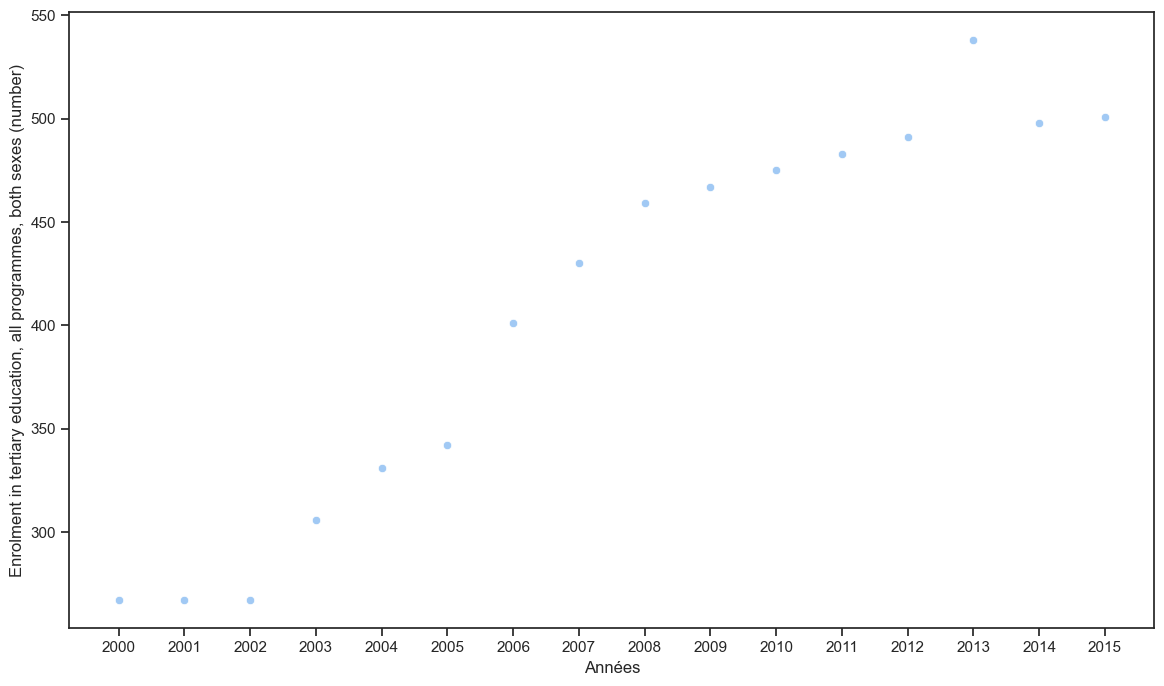

In [44]:
graph_pays(tertiary, 'Andorra')

In [45]:
def score_pays(df):
    df_perce = df.copy()
    for j in liste_annees:
        for i in range(0, len(df_perce)):
            df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
    return(df_perce)
#La fonction attribue le percentile correspondant à chaque valeur de notre Dataframe

In [46]:
gov_perce = score_pays(gov)
gov_perce

C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Country Code                    Country Name  \
1260            ABW                           Aruba   
12255           ALB                         Albania   
15920           AND                         Andorra   
23250           ARG                       Argentina   
26915           ARM                         Armenia   
...             ...                             ...   
730595          UKR                         Ukraine   
734260          URY                         Uruguay   
737925          USA                   United States   
745255          VCT  St. Vincent and the Grenadines   
774575          ZAF                    South Africa   

                                           Indicator Name   2000   2001  \
1260    Government expenditure on education as % of GD... 62.406 60.150   
12255   Government expenditure on education as % of GD... 30.827 31.579   
15920   Government expenditure on education as % of GD...  6.767  5.263   
23250   Government expenditure on education as % of GD... 58.647 62.406   
26915   Government expenditure on education as % of GD... 17.293 12.782   
...                                                   ...    ...    ...   
730595  Government expenditure on education as % of GD... 50.376 59.398   
734260  Government expenditure on education as % of GD... 11.278 17.293   
737925  Government expenditure on education as % of GD... 75.940 75.188   
745255  Government expenditure on education as % of GD... 96.241 95.489   
774575  Government expenditure on education as % of GD... 75.188 69.173   

         2002   2003   2004   2005   2006   2007   2008   2009   2010   2011  \
1260   62.406 60.150 52.632 55.639 57.895 63.158 63.158 78.195 90.226 81.203   
12255  26.316 21.805 23.308 25.564 24.812 25.564 23.308 20.301 21.053 24.812   
15920   4.511  3.759  2.256  3.008  7.519  5.263 16.541 15.789 16.541 20.301   
23250  46.617 32.331 31.579 36.842 44.361 51.128 60.902 70.677 59.398 69.173   
26915   8.271  9.774 12.030 15.038 14.286 16.541 18.797 30.075 18.045 19.549   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
730595 71.429 75.188 72.556 84.962 87.218 86.466 90.977 93.233 90.977 82.707   
734260 10.526  8.271 12.782 14.286 18.045 22.556 27.820 29.323 38.346 44.361   
737925 69.173 74.436 73.684 66.917 74.436 73.684 73.684 65.414 68.421 68.421   
745255 94.737 97.744 95.489 87.970 84.962 82.707 83.459 74.436 62.406 63.158   
774575 63.910 60.902 67.669 65.414 67.669 68.421 61.654 64.662 76.692 79.699   

         2012   2013   2014   2015          Income Group  
1260   87.970 89.474 83.459 82.707  High income: nonOECD  
12255  27.068 27.068 26.316 25.564   Upper middle income  
15920  15.038  9.023 18.797 22.556  High income: nonOECD  
23250  69.173 70.677 70.677 69.925   Upper middle income  
26915  13.534 12.030  8.271 14.286   Lower middle income  
...       ...    ...    ...    ...                   ...  
730595 90.226 87.218 78.947 79.699   Lower middle income  
734260 42.105 41.353 41.353 42.105  High income: nonOECD  
737925 67.669 57.143 71.429 70.677     High income: OECD  
745255 63.158 63.158 60.902 59.398   Upper middle income  
774575 83.459 80.451 81.955 81.203   Upper middle income  

[133 rows x 20 columns]

In [47]:
tertiary_perce = score_pays(tertiary)
tertiary_perce

C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Country Code          Country Name  \
1204            ABW                 Aruba   
8534            AGO                Angola   
12199           ALB               Albania   
15864           AND               Andorra   
19529           ARE  United Arab Emirates   
...             ...                   ...   
734204          URY               Uruguay   
737869          USA         United States   
741534          UZB            Uzbekistan   
756194          VNM               Vietnam   
770854          YEM           Yemen, Rep.   

                                           Indicator Name    2000    2001  \
1204    Enrolment in tertiary education, all programme...   5.797   5.797   
8534    Enrolment in tertiary education, all programme...  23.913  21.739   
12199   Enrolment in tertiary education, all programme...  34.783  34.058   
15864   Enrolment in tertiary education, all programme...   1.449   0.725   
19529   Enrolment in tertiary education, all programme...  41.304  39.130   
...                                                   ...     ...     ...   
734204  Enrolment in tertiary education, all programme...  44.203  44.203   
737869  Enrolment in tertiary education, all programme... 100.000 100.000   
741534  Enrolment in tertiary education, all programme...  71.014  71.014   
756194  Enrolment in tertiary education, all programme...  82.609  81.884   
770854  Enrolment in tertiary education, all programme...  63.768  62.319   

          2002    2003   2004   2005   2006   2007   2008   2009   2010  \
1204     5.072   4.348  4.348  4.348  5.072  5.072  3.623  3.623  4.348   
8534    20.290  34.058 28.261 31.159 28.986 31.884 34.058 36.232 39.855   
12199   33.333  32.609 35.507 35.507 35.507 36.232 35.507 34.058 39.130   
15864    0.725   0.725  0.725  0.725  0.725  0.725  0.725  0.725  0.725   
19529   39.130  37.681 37.681 36.957 36.232 35.507 33.333 33.333 32.609   
...        ...     ...    ...    ...    ...    ...    ...    ...    ...   
734204  41.304  40.580 39.855 39.855 39.855 48.551 47.826 45.652 44.928   
737869 100.000 100.000 99.275 99.275 99.275 99.275 99.275 99.275 98.551   
741534  71.014  71.014 70.290 65.217 65.217 65.217 64.493 63.768 62.319   
756194  81.884  81.884 84.058 84.783 84.783 84.783 84.783 84.783 86.232   
770854  60.870  58.696 57.246 57.971 55.797 58.696 58.696 61.594 60.870   

         2011   2012   2013   2014   2015          Income Group  
1204    3.623  4.348  2.899  3.623  3.623  High income: nonOECD  
8534   42.754 47.101 50.725 51.449 51.449   Upper middle income  
12199  40.580 42.754 44.203 43.478 41.304   Upper middle income  
15864   0.725  0.725  0.725  0.725  0.725  High income: nonOECD  
19529  36.232 35.507 36.232 37.681 39.855  High income: nonOECD  
...       ...    ...    ...    ...    ...                   ...  
734204 44.203 41.304 39.855 39.855 39.130  High income: nonOECD  
737869 98.551 98.551 98.551 98.551 98.551     High income: OECD  
741534 60.870 55.072 55.797 54.348 55.072   Lower middle income  
756194 86.957 86.957 87.681 90.580 89.855   Lower middle income  
770854 59.420 56.522 56.522 56.522 56.522   Lower middle income  

[138 rows x 20 columns]

In [48]:
secondary_perce = score_pays(secondary)
secondary_perce

C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Country Code                    Country Name  \
1214            ABW                           Aruba   
8544            AGO                          Angola   
12209           ALB                         Albania   
15874           AND                         Andorra   
19539           ARE            United Arab Emirates   
...             ...                             ...   
741544          UZB                      Uzbekistan   
745209          VCT  St. Vincent and the Grenadines   
763534          WSM                           Samoa   
770864          YEM                     Yemen, Rep.   
774529          ZAF                    South Africa   

                                           Indicator Name   2000   2001  \
1214    Enrolment in upper secondary education, both s...  6.667  6.667   
8544    Enrolment in upper secondary education, both s... 37.333 38.667   
12209   Enrolment in upper secondary education, both s... 44.000 44.000   
15874   Enrolment in upper secondary education, both s...  0.667  0.667   
19539   Enrolment in upper secondary education, both s... 38.667 39.333   
...                                                   ...    ...    ...   
741544  Enrolment in upper secondary education, both s... 81.333 81.333   
745209  Enrolment in upper secondary education, both s...  6.000  5.333   
763534  Enrolment in upper secondary education, both s... 12.000 11.333   
770864  Enrolment in upper secondary education, both s... 70.667 70.000   
774529  Enrolment in upper secondary education, both s... 88.667 88.667   

         2002   2003   2004   2005   2006   2007   2008   2009   2010   2011  \
1214    6.667  6.667  6.667  6.667  6.667  6.667  6.667  6.667  6.667  6.667   
8544   42.667 45.333 46.000 48.000 52.667 51.333 53.333 54.667 56.667 58.667   
12209  44.000 44.667 44.667 46.000 46.667 47.333 46.000 39.333 40.000 41.333   
15874   0.667  0.667  0.667  0.667  0.667  0.667  0.667  0.667  0.667  0.667   
19539  37.333 37.333 39.333 37.333 37.333 38.000 37.333 36.000 38.000 36.000   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
741544 81.333 81.333 81.333 83.333 84.000 85.333 84.667 84.667 84.667 84.000   
745209  5.333  5.333  4.667  4.667  5.333  6.000  6.000  6.000  6.000  6.000   
763534 11.333 12.000 11.333 11.333 11.333 11.333 11.333 11.333 11.333 11.333   
770864 70.667 71.333 72.000 71.333 70.667 70.667 70.667 70.000 70.000 70.000   
774529 89.333 89.333 90.000 89.333 90.000 91.333 90.000 90.667 90.000 90.000   

         2012   2013   2014   2015          Income Group  
1214    6.667  6.667  6.000  6.000  High income: nonOECD  
8544   58.667 56.667 56.000 56.000   Upper middle income  
12209  39.333 41.333 38.667 38.667   Upper middle income  
15874   0.667  0.667  0.667  0.667  High income: nonOECD  
19539  36.667 35.333 40.000 40.000  High income: nonOECD  
...       ...    ...    ...    ...                   ...  
741544 84.667 84.667 84.000 84.000   Lower middle income  
745209  6.000  6.000  5.333  5.333   Upper middle income  
763534 10.000  9.333 10.000 10.000   Lower middle income  
770864 71.333 71.333 71.333 71.333   Lower middle income  
774529 90.667 90.667 91.333 91.333   Upper middle income  

[150 rows x 20 columns]

In [49]:
pc_perce = score_pays(pc)
pc_perce

C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Country Code          Country Name  \
13079           ALB               Albania   
20409           ARE  United Arab Emirates   
46064           AZE            Azerbaijan   
49729           BDI               Burundi   
57059           BEN                 Benin   
...             ...                   ...   
727754          UGA                Uganda   
731419          UKR               Ukraine   
757074          VNM               Vietnam   
764404          WSM                 Samoa   
771734          YEM           Yemen, Rep.   

                             Indicator Name   2000   2001   2002   2003  \
13079   Personal computers (per 100 people) 20.455 20.455 21.591 20.455   
20409   Personal computers (per 100 people) 70.455 69.318 68.182 75.000   
46064   Personal computers (per 100 people) 18.182 18.182 20.455 21.591   
49729   Personal computers (per 100 people)  1.136  1.136  1.136  1.136   
57059   Personal computers (per 100 people)  6.818  4.545  4.545  6.818   
...                                     ...    ...    ...    ...    ...   
727754  Personal computers (per 100 people) 12.500 11.364  7.955  7.955   
731419  Personal computers (per 100 people) 37.500 35.227 32.955 30.682   
757074  Personal computers (per 100 people) 19.318 19.318 18.182 27.273   
764404  Personal computers (per 100 people) 17.045 17.045 14.773 17.045   
771734  Personal computers (per 100 people) 10.227  9.091 17.045 15.909   

         2004   2005   2006   2007   2008   2009   2010   2011   2012   2013  \
13079  17.045 17.045 28.409 27.273 27.273 27.273 27.273 27.273 27.273 27.273   
20409  73.864 72.727 72.727 71.591 71.591 71.591 71.591 71.591 71.591 71.591   
46064  25.000 22.727 25.000 26.136 38.636 38.636 38.636 38.636 38.636 38.636   
49729   7.955  9.091  9.091  7.955  6.818  6.818  6.818  6.818  6.818  6.818   
57059   4.545  2.273  3.409  4.545  4.545  4.545  4.545  4.545  4.545  4.545   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
727754  6.818 11.364 11.364 11.364 11.364 11.364 11.364 11.364 11.364 11.364   
731419 29.545 30.682 30.682 30.682 26.136 26.136 26.136 26.136 26.136 26.136   
757074 36.364 45.455 46.591 45.455 42.045 42.045 42.045 42.045 42.045 42.045   
764404 20.455 20.455 17.045 15.909 14.773 14.773 14.773 14.773 14.773 14.773   
771734 18.182 21.591 21.591 18.182 18.182 18.182 18.182 18.182 18.182 18.182   

         2014   2015          Income Group  
13079  27.273 27.273   Upper middle income  
20409  71.591 71.591  High income: nonOECD  
46064  38.636 38.636   Upper middle income  
49729   6.818  6.818            Low income  
57059   4.545  4.545            Low income  
...       ...    ...                   ...  
727754 11.364 11.364            Low income  
731419 26.136 26.136   Lower middle income  
757074 42.045 42.045   Lower middle income  
764404 14.773 14.773   Lower middle income  
771734 18.182 18.182   Lower middle income  

[88 rows x 20 columns]

In [50]:
internet_perce = score_pays(internet)
internet_perce

C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perce[j].iloc[i] = stats.percentileofscore(df[j], df[j].iloc[i])
C:\Users\Pando\AppData\Local\Temp\ipykernel_24000\594544926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

Country Code                    Country Name  \
1375            ABW                           Aruba   
8705            AGO                          Angola   
12370           ALB                         Albania   
16035           AND                         Andorra   
19700           ARE            United Arab Emirates   
...             ...                             ...   
745370          VCT  St. Vincent and the Grenadines   
756365          VNM                         Vietnam   
763695          WSM                           Samoa   
771025          YEM                     Yemen, Rep.   
774690          ZAF                    South Africa   

                         Indicator Name   2000   2001   2002   2003   2004  \
1375    Internet users (per 100 people) 78.750 75.000 71.250 68.750 67.500   
8705    Internet users (per 100 people) 10.625  8.125 11.875 10.625 11.875   
12370   Internet users (per 100 people) 12.500 20.000 16.250 20.625 23.125   
16035   Internet users (per 100 people) 73.750 67.500 61.875 63.125 71.250   
19700   Internet users (per 100 people) 84.375 81.875 81.250 77.500 73.750   
...                                 ...    ...    ...    ...    ...    ...   
745370  Internet users (per 100 people) 54.375 54.375 49.375 46.250 43.750   
756365  Internet users (per 100 people) 23.125 32.500 30.000 36.250 45.625   
763695  Internet users (per 100 people) 29.375 39.375 34.375 30.625 26.250   
771025  Internet users (per 100 people)  9.375  5.625 19.375 16.875 18.125   
774690  Internet users (per 100 people) 60.625 58.750 53.750 48.750 46.875   

         2005   2006   2007   2008   2009   2010   2011   2012   2013   2014  \
1375   67.500 65.000 64.375 75.000 75.000 73.750 79.062 82.500 83.125 85.000   
8705   16.875 15.625 13.750 13.125 12.500 10.000  9.062 14.375 13.125 11.250   
12370  35.625 41.875 44.375 52.500 64.375 64.375 62.812 62.500 60.625 60.000   
16035  76.875 80.000 90.625 87.500 91.250 92.500 90.000 92.500 96.875 97.500   
19700  79.375 81.875 82.500 81.875 79.688 80.000 86.875 91.250 91.250 91.875   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
745370 44.375 45.000 45.312 46.250 54.375 50.625 48.750 48.750 47.500 48.750   
756365 49.375 53.125 52.500 53.125 48.125 47.500 46.875 44.375 41.875 41.875   
763695 25.625 25.625 23.125 20.625 19.688 18.438 23.750 23.125 24.375 25.625   
771025 15.625 13.125 24.375 26.250 29.375 28.750 29.375 28.750 28.125 26.875   
774690 40.625 36.875 33.125 30.000 30.312 40.000 44.375 50.000 53.125 50.000   

         2015          Income Group  
1375   90.000  High income: nonOECD  
8705   11.250   Upper middle income  
12370  58.750   Upper middle income  
16035  98.125  High income: nonOECD  
19700  91.250  High income: nonOECD  
...       ...                   ...  
745370 48.125   Upper middle income  
756365 41.250   Lower middle income  
763695 25.000   Lower middle income  
771025 23.750   Lower middle income  
774690 48.750   Upper middle income  

[160 rows x 20 columns]

In [51]:
score_moy_list = [tertiary_perce, secondary_perce, gov_perce, pc_perce, internet_perce]

In [52]:
score_moy = pd.concat(score_moy_list)
#On regroupe nos 5 sous Dataframes

In [53]:
df_score_moy = score_moy.groupby(['Country Name']).mean()
df_score_moy
#Avec la ligne suivante, on regroupe chaque ligne dattribué à un même pays, puis on effectue les moyennes pour obtenir un score
#général créé à partir de nos 5 indicateurs (ex : le score général d'Andorre en 2000 est basé sur la moyenne des scores de
#chaque indicateur d'Andorre pour cette même année)

2000   2001   2002   2003   2004   2005   2006   2007  \
Country Name                                                                 
Albania            28.513 30.018 28.298 28.032 28.731 31.948 35.454 36.155   
Algeria            62.867 62.034 62.450 62.895 65.570 65.381 65.537 65.528   
Andorra            20.658 18.539 16.944 17.069 18.724 20.318 22.228 24.320   
Angola             23.957 22.844 24.944 30.005 28.712 32.011 32.426 32.322   
Argentina          74.780 75.780 70.583 66.401 66.823 67.283 69.369 70.738   
...                   ...    ...    ...    ...    ...    ...    ...    ...   
Uruguay            44.464 44.718 40.906 40.640 40.461 40.014 42.829 44.329   
Uzbekistan         59.533 58.699 58.491 58.699 58.458 57.850 60.572 61.017   
Vietnam            41.684 44.567 43.355 48.469 55.349 59.871 61.500 60.912   
West Bank and Gaza 37.549 37.938 37.521 38.482 38.448 48.442 48.059 47.439   
Yemen, Rep.        38.509 36.759 41.989 40.703 41.388 41.630 40.295 42.980   

                     2008   2009   2010   2011   2012   2013   2014   2015  
Country Name                                                                
Albania            36.918 37.068 38.366 39.362 39.785 40.100 39.147 38.312  
Algeria            64.937 64.789 63.819 63.748 64.164 63.492 64.298 65.131  
Andorra            26.358 27.108 27.608 27.923 27.232 26.822 29.422 30.518  
Angola             33.505 34.466 35.507 36.828 40.048 40.172 39.566 39.566  
Argentina          72.546 74.666 74.407 77.536 77.703 77.922 78.235 77.891  
...                   ...    ...    ...    ...    ...    ...    ...    ...  
Uruguay            44.474 43.973 46.204 46.881 44.654 43.615 44.094 43.632  
Uzbekistan         60.136 60.312 59.724 59.332 58.246 58.071 58.408 59.899  
Vietnam            59.984 58.318 58.592 58.626 57.792 57.201 58.167 57.717  
West Bank and Gaza 47.917 48.300 49.000 48.556 47.075 47.028 46.778 46.811  
Yemen, Rep.        43.449 44.788 44.450 44.244 43.697 43.540 43.228 42.447  

[160 rows x 16 columns]

<AxesSubplot:xlabel='2015', ylabel='Count'>

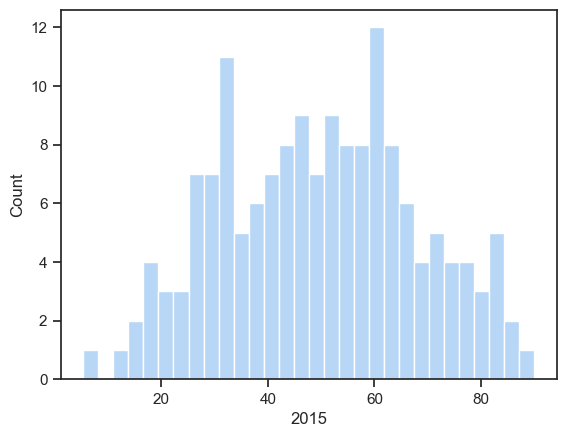

In [54]:
sns.histplot(df_score_moy['2015'], bins = 30)
#Distribution du score général pour l'année sélectionnée

In [55]:
fin = df_score_moy.sort_values(by=['2015'], ascending = False)
fin2 = fin.head(10)
#Affiche les 10 pays aux scores les plus élevés pour l'année sélectionnée. On choisit l'année 2015

In [56]:
top_pays = list(fin2.reset_index()['Country Name'])
top_pays
#Affiche les noms des 10 pays sélectionnés

['United Kingdom',
 'United States',
 'France',
 'Canada',
 'Sweden',
 'Netherlands',
 'Brazil',
 'Korea, Rep.',
 'Germany',
 'Denmark']

[Text(0.5, 1.0, 'Évolution du score global des pays les plus prometteurs entre 2000 et 2015')]

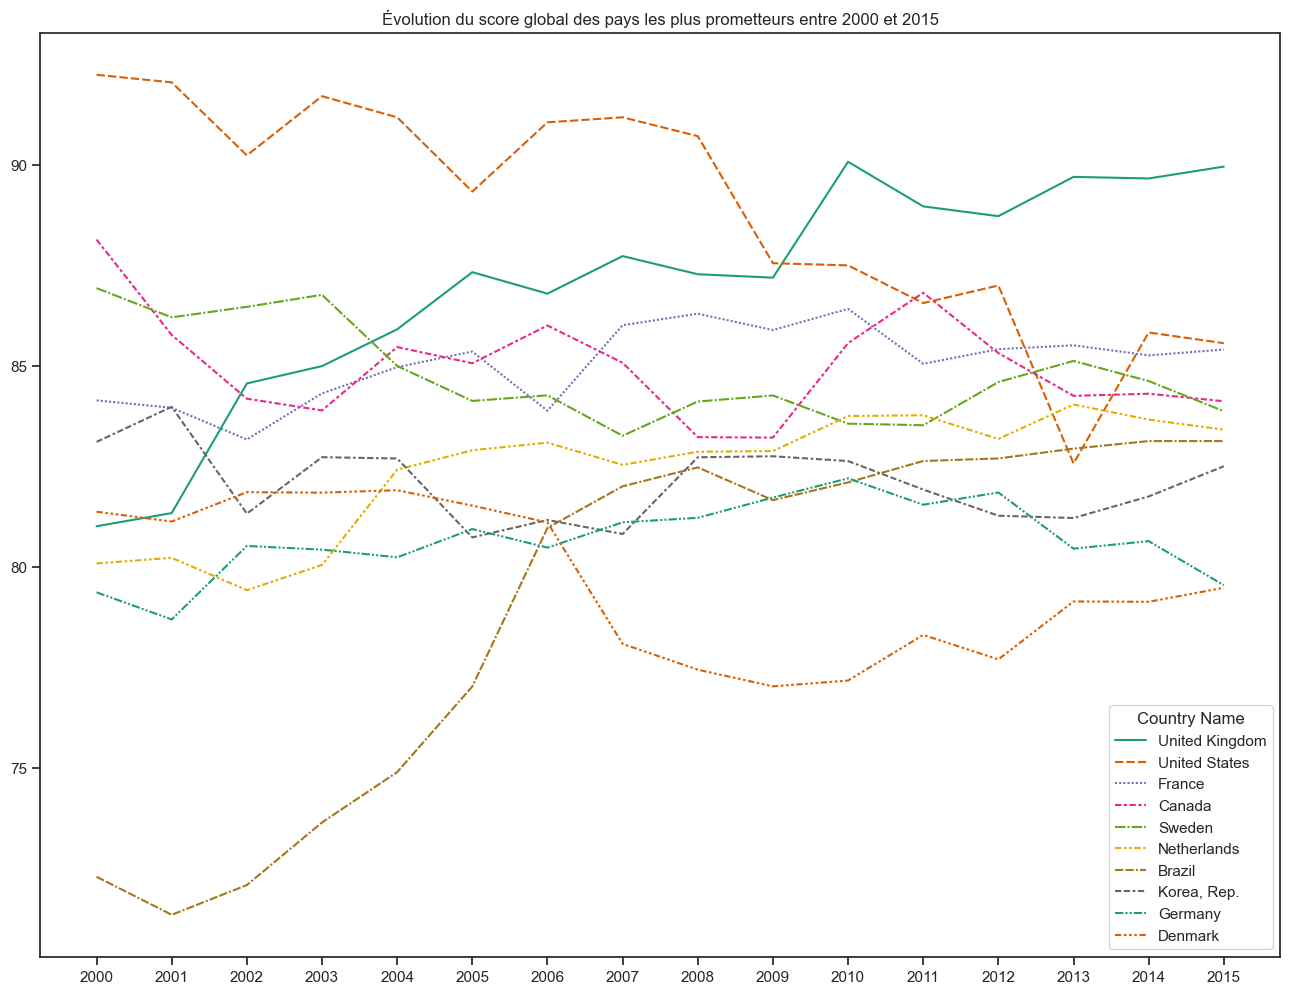

In [57]:
plt.figure(figsize = (16, 12))
sns.lineplot(data = fin2.T, palette='Dark2').set(title='Évolution du score global des pays les plus prometteurs entre 2000 et 2015')
#On modélise l'évolution du score global de ces 10 pays entre 2000 et 2015

In [ ]:
#En observant les courbes des 10 meilleurs pays potentiels, on constate que les scores les plus élevés en 2015 sont ceux du 
#Royaume-Uni, des États-Unis, de la France, du Canada et de la Suède
#Cependant il faut aussi prendre en considération les variations de la courbe pour chaque pays
#En 2015, les scores des États-Unis et la Suède semblent décroître tandis que celui du Royaume-Uni est croissant
#Enfin, on constate également que le score de la Corée affiche la plus forte croissance des 10 pays
#En conclusion, le pays qui semble le plus propice 

In [70]:
score_moy.loc[score_moy['Country Name']=='Denmark']
#On applique cette ligne de code pour chaque pays de notre top 10 afin de vérifier avec combien d'indicateurs leurs scores sont établis

Country Code Country Name  \
195449          DNK      Denmark   
195459          DNK      Denmark   
195505          DNK      Denmark   
196329          DNK      Denmark   
195620          DNK      Denmark   

                                           Indicator Name   2000   2001  \
195449  Enrolment in tertiary education, all programme... 62.319 61.594   
195459  Enrolment in upper secondary education, both s... 57.333 57.333   
195505  Government expenditure on education as % of GD... 96.992 97.744   
196329                Personal computers (per 100 people) 97.727 97.727   
195620                    Internet users (per 100 people) 92.500 91.250   

         2002   2003   2004   2005   2006   2007   2008   2009   2010   2011  \
195449 61.594 60.870 61.594 62.319 60.145 57.971 56.522 55.072 55.797 57.971   
195459 56.000 56.667 56.000 56.000 55.333 54.000 54.000 54.000 54.000 56.000   
195505 96.992 96.992 97.744 96.241 96.992 96.241 96.241 96.241 96.241 97.744   
196329 96.591 96.591 95.455 94.318 94.318 84.091 82.955 82.955 82.955 82.955   
195620 98.125 98.125 98.750 98.750 98.750 98.125 97.500 96.875 96.875 96.875   

         2012   2013   2014   2015       Income Group  
195449 60.145 59.420 59.420 63.043  High income: OECD  
195459 54.667 57.333 56.667 56.667  High income: OECD  
195505 93.233 98.496 98.496 98.496  High income: OECD  
196329 82.955 82.955 82.955 82.955  High income: OECD  
195620 97.500 97.500 98.125 96.250  High income: OECD

In [ ]:
#USA 4 indicateurs
#Canada 4 indicateurs
#Brazil 4 indicateurs
#Germany 4 indicateurs